In [ ]:
#import ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import deeplearning libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout, Flatten
from keras import Sequential
from keras.layers import *
print(tf.__version__)


2.15.0


In [ ]:
fashion_mnist =  keras.datasets.fashion_mnist### machine gets connected
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
"""Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

'Label\tDescription\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

In [ ]:
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

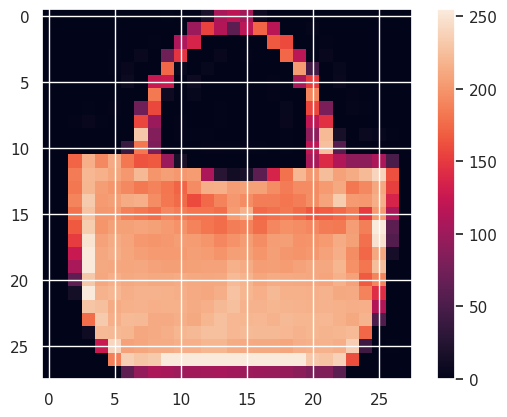

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(True)
plt.show()

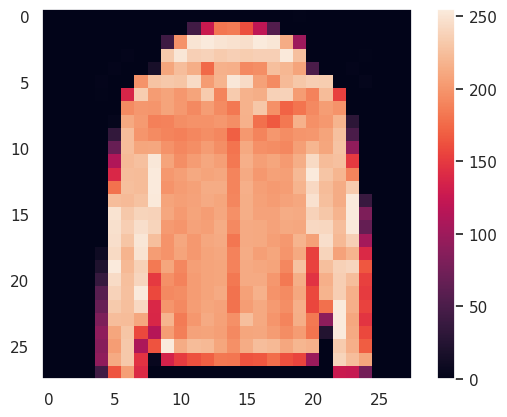

In [ ]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()

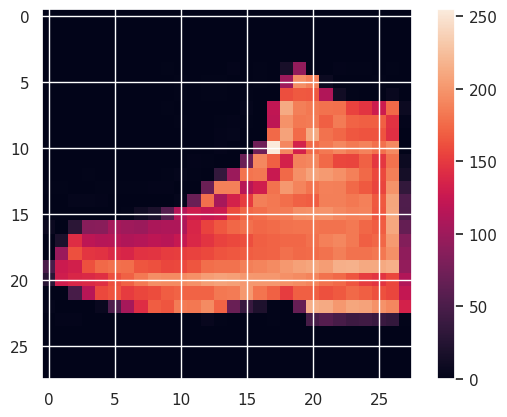

In [ ]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
#normalize the data i.e changing the cell value to 0-1 image remains same the values changes from the range o-1
train_images = train_images/255.0
test_images = test_images/255.0

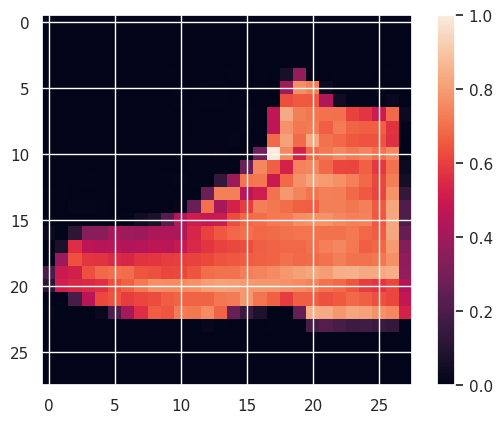

In [ ]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid(True)
plt.show()

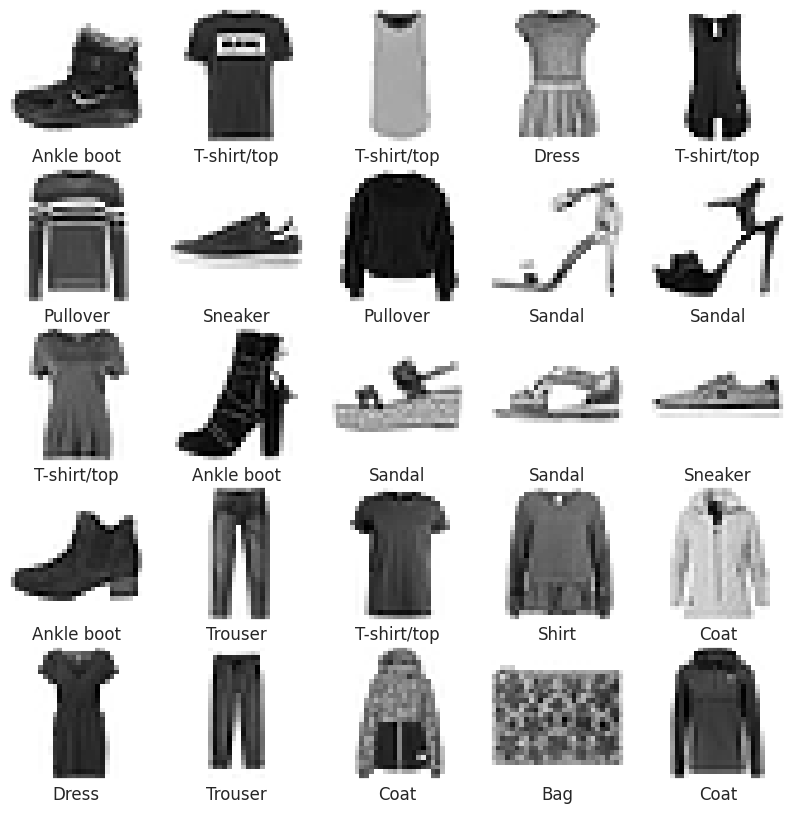

In [ ]:
#ploting multi plots
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#building multiLayer perceptron -DNN

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28),))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=40,batch_size=128)

Epoch 1/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3419 - accuracy: 0.8772 - val_loss: 0.3770 - val_accuracy: 0.8659
Epoch 2/40
469/469 [==============================] - 3s 5ms/step - loss: 0.3255 - accuracy: 0.8818 - val_loss: 0.3641 - val_accuracy: 0.8697
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.3113 - accuracy: 0.8876 - val_loss: 0.3639 - val_accuracy: 0.8693
Epoch 4/40
469/469 [==============================] - 3s 5ms/step - loss: 0.3001 - accuracy: 0.8905 - val_loss: 0.3473 - val_accuracy: 0.8734
Epoch 5/40
469/469 [==============================] - 3s 5ms/step - loss: 0.2913 - accuracy: 0.8923 - val_loss: 0.3422 - val_accuracy: 0.8759
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2815 - accuracy: 0.8968 - val_loss: 0.3393 - val_accuracy: 0.8749
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2694 - accuracy: 0.9006 - val_loss: 0.3449 - val_accuracy: 0.8751
Epoch 

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.2 MB/s eta 0:00:00
